In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt



In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


In [4]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(512, activation='relu'),     # Fully connected layer with 512 neurons and ReLU activation
    Dense(10, activation='softmax')    # Output layer with 10 classes (CIFAR-10 has 10 classes)
])

# Print model summary to see the architecture
model.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define a deeper network
'''model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),  # Added additional hidden layer
    Dense(128, activation='relu'),  # Added additional hidden layer
    Dense(10, activation='softmax')
])
'''

In [5]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.2626 - loss: 2.2414 - val_accuracy: 0.3257 - val_loss: 1.8207
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.3738 - loss: 1.7533 - val_accuracy: 0.3766 - val_loss: 1.7213
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4135 - loss: 1.6595 - val_accuracy: 0.4005 - val_loss: 1.6721
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4330 - loss: 1.6043 - val_accuracy: 0.4464 - val_loss: 1.5687
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4443 - loss: 1.5659 - val_accuracy: 0.4511 - val_loss: 1.5505
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4557 - loss: 1.5274 - val_accuracy: 0.4519 - val_loss: 1.5394
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4688 - loss: 1.4972 - val_accuracy: 0.4530 - val_loss: 1.5234
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4711 - loss: 1.4862 - 

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4572 - loss: 1.5267
Test accuracy: 0.4554


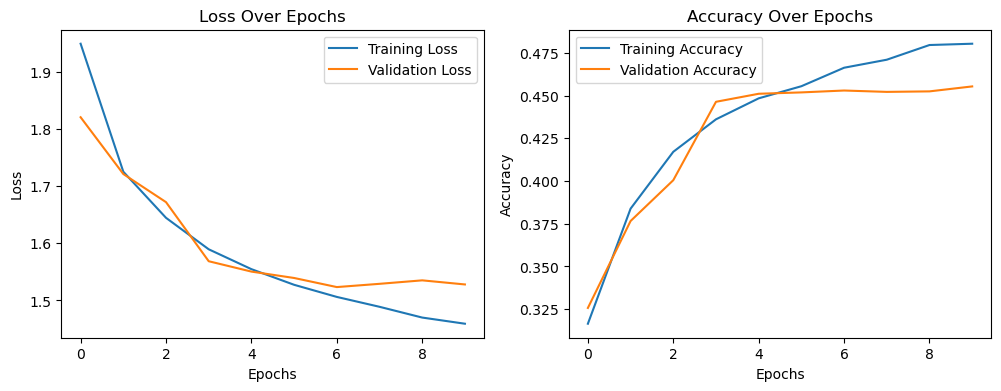

In [7]:
# Plot the training loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


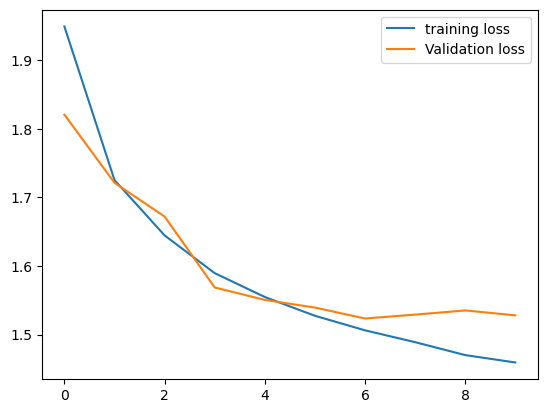

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()